In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.clasterization import clasterize
from src.fetch_comments import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [3]:
comments = fetch_comments(id='L_Guz73e6fw', max_result=3000, max_len=200)

In [4]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens']

In [5]:
embeddings = embed(model_name=embed_model_names[0], sentences=comments)

embeddings.shape

(3001, 768)

In [27]:
from collections import Counter

clasters = clasterize(method_name='dbscan', embeddings=embeddings, eps=0.24, min_samples=10, metric='cosine')

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')

Claster -1 has 1361 comments
Claster 0 has 1605 comments
Claster 2 has 22 comments
Claster 1 has 13 comments


In [31]:
from collections import Counter

clasters = clasterize(method_name='gaussian_mixture', embeddings=embeddings, n_components=5)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')

Claster 4 has 833 comments
Claster 0 has 612 comments
Claster 3 has 476 comments
Claster 2 has 442 comments
Claster 1 has 638 comments


In [32]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Kinda sad Lex didn't push Sam on open sourcing more things.

Ya know, the whole OPEN part of OpenAI.
----------
Regarding 1:44:00 Central planning vs. distributed human ingenuity, you guys both seemed to forget about the value of free will/voluntary participation.  The problem with any sort of central planning 
----------
why GPT respond using I/me pronouns, I get that he learn our language which does not have any pronouns for an AI machine, but perhaps is time or on time still to give it a pronouns to use, that will b
----------
Talking about not anthropomorphizing AI models and still sitting there talking about GPT as if it "has trouble reasoning" or is capable of "thinking" at all, lol. I assure you, the matrix of floating-
----------
The biggest obvious danger of AGI isn't talked about. Like people talk of misinformation, jobs, economic issues and an AGI becoming independent and malevolent. And yet, many of us are independent and 
----------
Claster 1
In terms of AI it wi

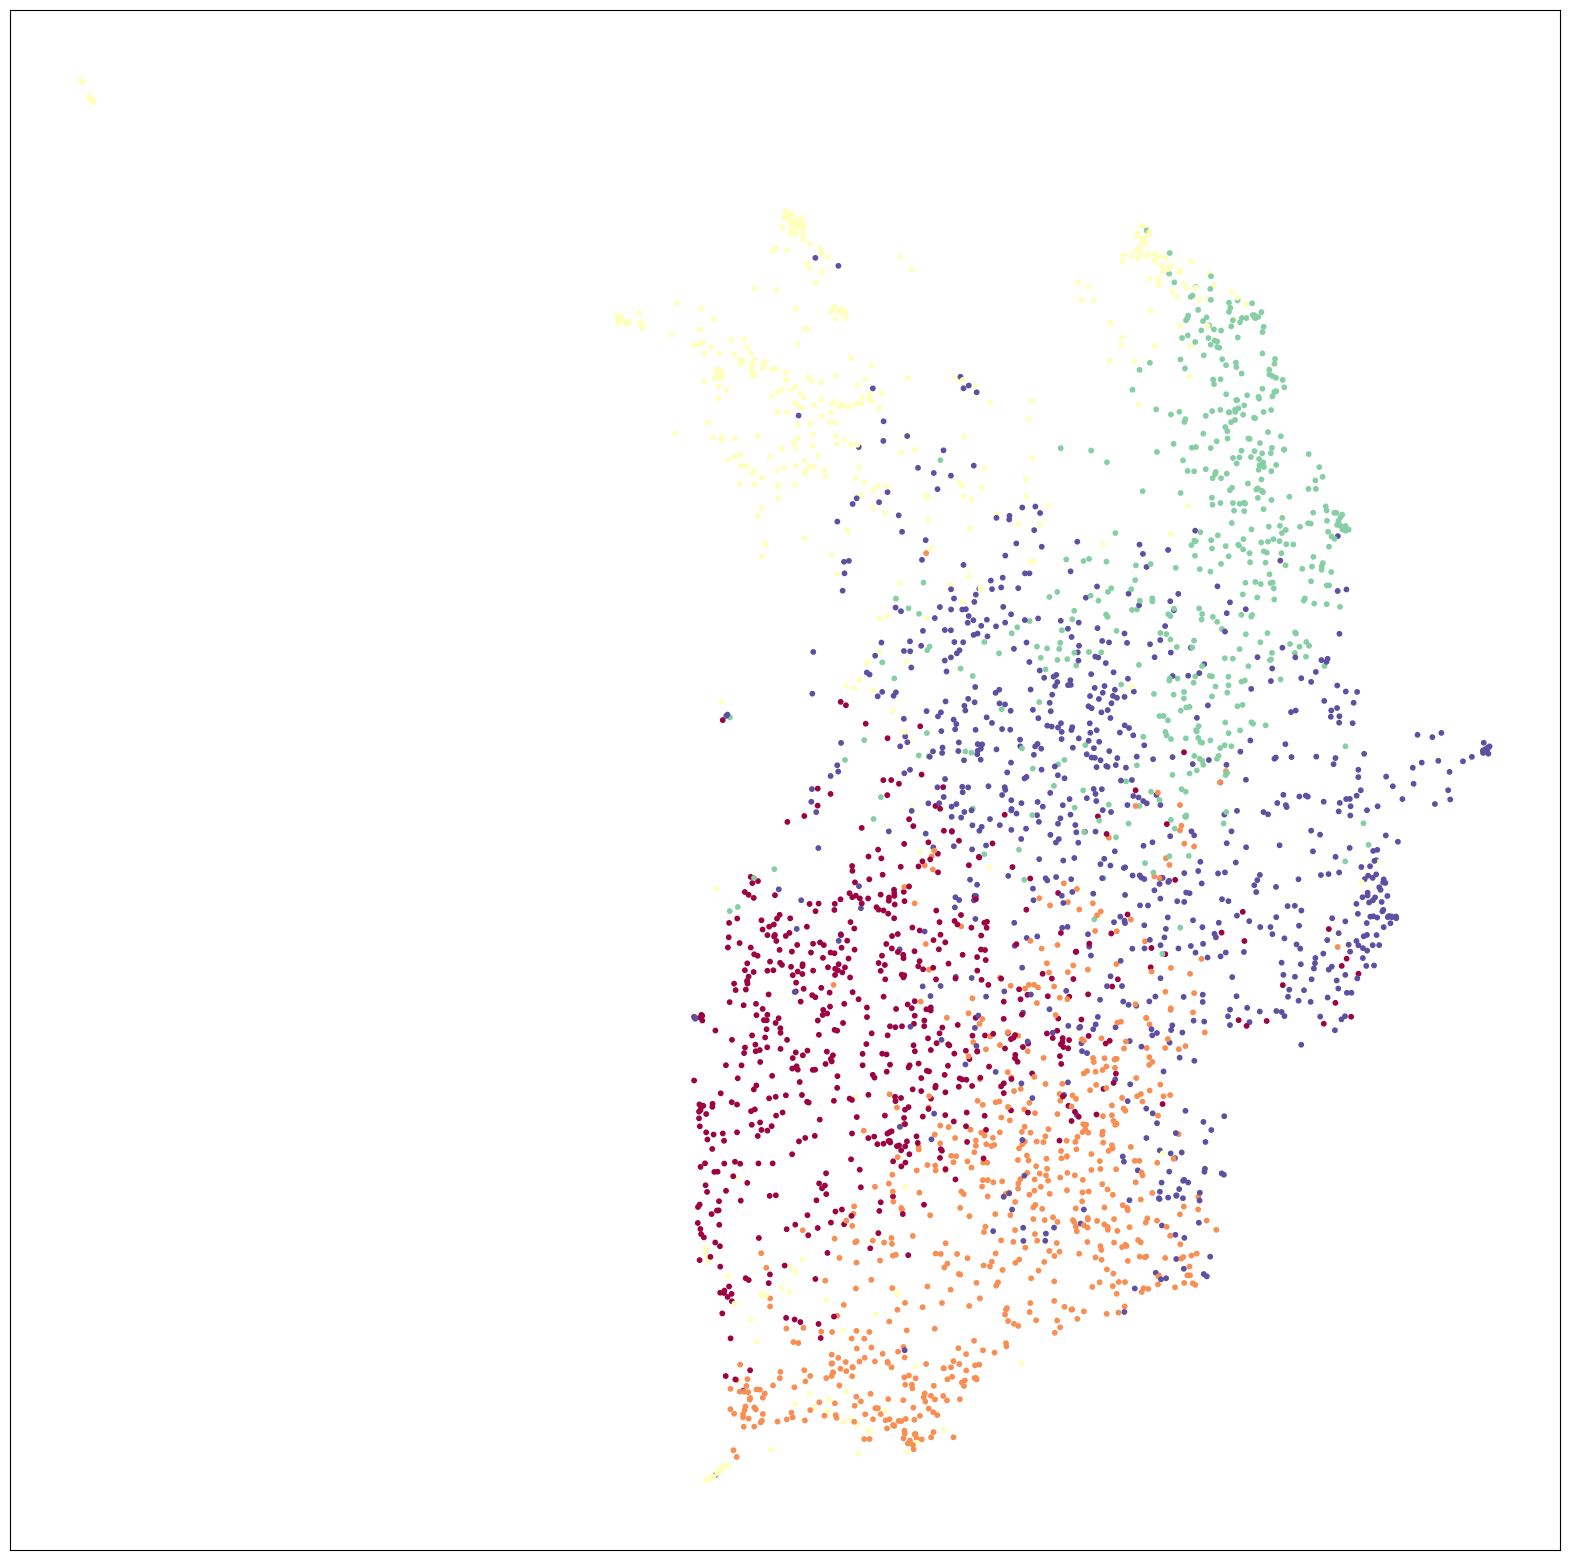

In [33]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters, s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.show()